# Multi_Naive_Bayes

Importing Library as follows

In [1]:
import pandas as pd

Importing dataset form local host and get dummy variables

In [2]:
telecom = pd.read_csv("D:/Statistics (Python)/Cases/Telecom/Telecom.csv")

dum_telecom = pd.get_dummies(telecom, drop_first=True)

Importing sklearn library

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [4]:
X = dum_telecom.iloc[:,0:2]
y = dum_telecom.iloc[:,2]

 Create training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)

multinomial = MultinomialNB()

Model Building: Apriori Probs Calculated

In [6]:
multinomial.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

 Posterior Probs Calculated

In [7]:
y_probs = multinomial.predict_proba(X_test) 

 Applying built on test data

In [8]:
y_pred = multinomial.predict(X_test) 

In [9]:
print(confusion_matrix(y_test, y_pred))

[[18  4]
 [ 2 21]]


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.84      0.91      0.87        23

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



In [11]:
print(accuracy_score(y_test, y_pred))

0.8666666666666667


ROC

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

Compute predicted probabilities: y_pred_prob

In [14]:
y_probs = multinomial.predict_proba(X_test)
y_pred_prob = y_probs[:,1]

 Generate ROC curve values: fpr, tpr, thresholds

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

 Plot ROC curve

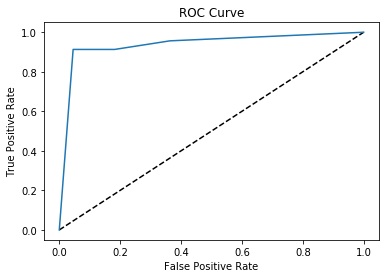

In [17]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [18]:
roc_auc_score(y_test, y_pred_prob)

0.9377470355731224